Importing Dependencies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [16]:
dataset=pd.read_csv("car data.csv")

In [18]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
dataset.shape

(301, 9)

301 Rows means 301 cars data is available and 9 featurtes

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [29]:
#Check missing values
#There are no missing values

dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [31]:
# Check distribution of categorical data

In [39]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the categorical values into numerical values of the dataset

In [44]:
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [46]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data in train and test data

In [53]:
X=dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=dataset['Selling_Price']

In [55]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [57]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size =0.1,random_state=3)

In [61]:
#Model Training

In [63]:
#Linear Regression

In [67]:
lin=LinearRegression()

In [69]:
lin.fit(X_train,y_train)

LinearRegression()

In [71]:
#Model Evaluation


In [73]:
training_data_prediction = lin.predict(X_train)

In [79]:
# R Square Error
error_score=metrics.r2_score(y_train,training_data_prediction)
print(error_score)

0.8849815853900536


In [81]:
#Visualize the prediction

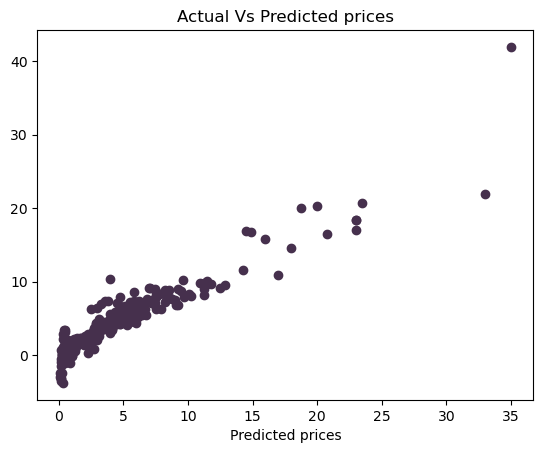

In [89]:
plt.scatter(y_train, training_data_prediction, color = '#46304D')
plt.xlabel("Actual price")
plt.xlabel("Predicted prices")
plt.title("Actual Vs Predicted prices")
plt.show()

In [93]:
test_data_prediction = lin.predict(X_test)

In [97]:
# R Square Error
error_score=metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.7979072218427145


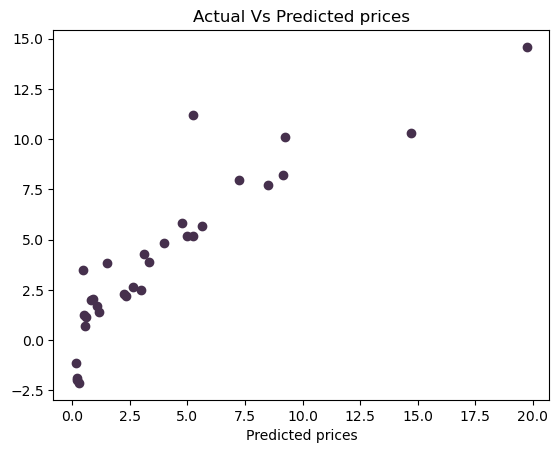

In [99]:
plt.scatter(y_test, test_data_prediction, color = '#46304D')
plt.xlabel("Actual price")
plt.xlabel("Predicted prices")
plt.title("Actual Vs Predicted prices")
plt.show()

In [101]:
# Lasso Regression

In [103]:
las=Lasso()

In [105]:
las.fit(X_train,y_train)

Lasso()

In [71]:
#Model Evaluation


In [107]:
training_data_prediction = las.predict(X_train)

In [109]:
# R Square Error
error_score=metrics.r2_score(y_train,training_data_prediction)
print(error_score)

0.8469788692279795


In [111]:
#Visualize the prediction

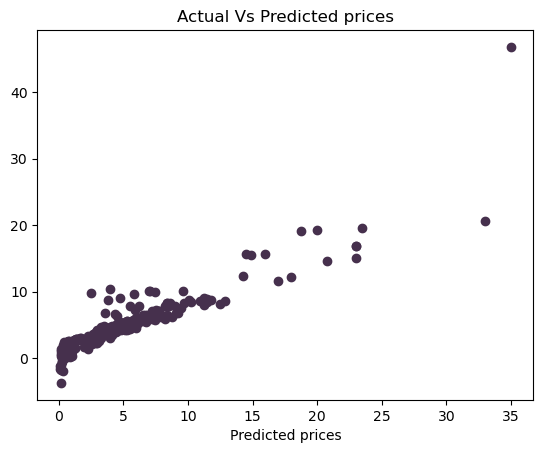

In [113]:
plt.scatter(y_train, training_data_prediction, color = '#46304D')
plt.xlabel("Actual price")
plt.xlabel("Predicted prices")
plt.title("Actual Vs Predicted prices")
plt.show()

In [115]:
test_data_prediction = las.predict(X_test)

In [117]:
# R Square Error
error_score=metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.7946492652998904


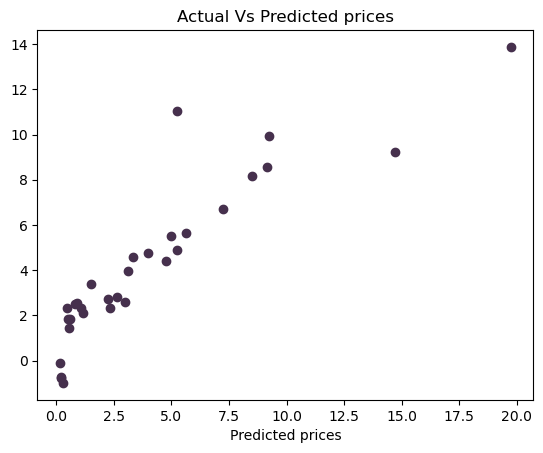

In [119]:
plt.scatter(y_test, test_data_prediction, color = '#46304D')
plt.xlabel("Actual price")
plt.xlabel("Predicted prices")
plt.title("Actual Vs Predicted prices")
plt.show()